<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [33]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import tensorflow as tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  2.4.0
Tensorflow version:  2.3.0


### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
df = sklearn.datasets.load_diabetes(return_X_y=False, as_frame=False)
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [4]:
df.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [5]:
df.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### Prepare input data

In [6]:
# insert code here

X = df.data.astype(np.uint8)
n_cols = X.shape[1]

# output
y = df.target.astype(np.uint8)



### Split the data (training/test)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

In [8]:
X_train.shape

(309, 10)

In [9]:
y_train.shape

(309,)

In [10]:
X.shape

(442, 10)

### Create the model's architecture

In [11]:
model = Sequential()

In [12]:
# Add the first hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                165       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [14]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [19]:
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [23]:
%%time
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 1)

Epoch 1/1000
24/24 [==============================] - 0s 4ms/step - loss: 12363.2588 - mse: 12363.2588 - val_loss: 12723.0029 - val_mse: 12723.0029
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 12359.1025 - mse: 12359.1025 - val_loss: 12718.8369 - val_mse: 12718.8369
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: 12354.9307 - mse: 12354.9307 - val_loss: 12714.7139 - val_mse: 12714.7139
Epoch 4/1000
24/24 [==============================] - 0s 2ms/step - loss: 12350.9277 - mse: 12350.9277 - val_loss: 12710.7490 - val_mse: 12710.7490
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 12346.8213 - mse: 12346.8213 - val_loss: 12706.6084 - val_mse: 12706.6074
Epoch 6/1000
24/24 [==============================] - 0s 3ms/step - loss: 12342.6406 - mse: 12342.6396 - val_loss: 12702.3193 - val_mse: 12702.3193
Epoch 7/1000
24/24 [==============================] - 0s 3ms/step - loss: 12338.4658 - mse: 12338.4658 - val_los

24/24 [==============================] - 0s 4ms/step - loss: 12138.2266 - mse: 12138.2266 - val_loss: 12498.6270 - val_mse: 12498.6270
Epoch 57/1000
24/24 [==============================] - 0s 3ms/step - loss: 12134.2324 - mse: 12134.2324 - val_loss: 12494.6055 - val_mse: 12494.6055
Epoch 58/1000
24/24 [==============================] - 0s 3ms/step - loss: 12130.2080 - mse: 12130.2080 - val_loss: 12490.7627 - val_mse: 12490.7627
Epoch 59/1000
24/24 [==============================] - 0s 2ms/step - loss: 12126.2588 - mse: 12126.2588 - val_loss: 12486.6406 - val_mse: 12486.6406
Epoch 60/1000
24/24 [==============================] - 0s 2ms/step - loss: 12122.2090 - mse: 12122.2090 - val_loss: 12482.6748 - val_mse: 12482.6748
Epoch 61/1000
24/24 [==============================] - 0s 2ms/step - loss: 12118.1641 - mse: 12118.1660 - val_loss: 12478.6689 - val_mse: 12478.6689
Epoch 62/1000
24/24 [==============================] - 0s 2ms/step - loss: 12114.2520 - mse: 12114.2520 - val_loss: 1247

24/24 [==============================] - 0s 4ms/step - loss: 11916.6387 - mse: 11916.6387 - val_loss: 12277.7607 - val_mse: 12277.7607
Epoch 112/1000
24/24 [==============================] - 0s 3ms/step - loss: 11912.8057 - mse: 11912.8057 - val_loss: 12273.8457 - val_mse: 12273.8457
Epoch 113/1000
24/24 [==============================] - 0s 3ms/step - loss: 11908.9570 - mse: 11908.9570 - val_loss: 12270.0693 - val_mse: 12270.0693
Epoch 114/1000
24/24 [==============================] - 0s 2ms/step - loss: 11905.0127 - mse: 11905.0127 - val_loss: 12265.9854 - val_mse: 12265.9854
Epoch 115/1000
24/24 [==============================] - 0s 2ms/step - loss: 11900.9316 - mse: 11900.9316 - val_loss: 12262.0381 - val_mse: 12262.0381
Epoch 116/1000
24/24 [==============================] - 0s 2ms/step - loss: 11896.9160 - mse: 11896.9160 - val_loss: 12257.9043 - val_mse: 12257.9043
Epoch 117/1000
24/24 [==============================] - 0s 2ms/step - loss: 11892.9463 - mse: 11892.9463 - val_loss

Epoch 166/1000
24/24 [==============================] - 0s 2ms/step - loss: 11699.6318 - mse: 11699.6318 - val_loss: 12061.2295 - val_mse: 12061.2295
Epoch 167/1000
24/24 [==============================] - 0s 2ms/step - loss: 11695.7598 - mse: 11695.7598 - val_loss: 12057.4668 - val_mse: 12057.4658
Epoch 168/1000
24/24 [==============================] - 0s 2ms/step - loss: 11691.9238 - mse: 11691.9238 - val_loss: 12053.5420 - val_mse: 12053.5420
Epoch 169/1000
24/24 [==============================] - 0s 2ms/step - loss: 11687.9541 - mse: 11687.9541 - val_loss: 12049.6650 - val_mse: 12049.6650
Epoch 170/1000
24/24 [==============================] - 0s 2ms/step - loss: 11684.0605 - mse: 11684.0605 - val_loss: 12045.7773 - val_mse: 12045.7764
Epoch 171/1000
24/24 [==============================] - 0s 2ms/step - loss: 11680.2305 - mse: 11680.2305 - val_loss: 12041.9893 - val_mse: 12041.9893
Epoch 172/1000
24/24 [==============================] - 0s 2ms/step - loss: 11676.3799 - mse: 11676.

24/24 [==============================] - 0s 2ms/step - loss: 11490.1113 - mse: 11490.1113 - val_loss: 11852.3906 - val_mse: 11852.3906
Epoch 221/1000
24/24 [==============================] - 0s 2ms/step - loss: 11486.2988 - mse: 11486.2988 - val_loss: 11848.6348 - val_mse: 11848.6348
Epoch 222/1000
24/24 [==============================] - 0s 2ms/step - loss: 11482.4883 - mse: 11482.4883 - val_loss: 11844.8428 - val_mse: 11844.8428
Epoch 223/1000
24/24 [==============================] - 0s 2ms/step - loss: 11478.6494 - mse: 11478.6494 - val_loss: 11840.9209 - val_mse: 11840.9199
Epoch 224/1000
24/24 [==============================] - 0s 2ms/step - loss: 11474.7500 - mse: 11474.7510 - val_loss: 11837.1748 - val_mse: 11837.1748
Epoch 225/1000
24/24 [==============================] - 0s 2ms/step - loss: 11470.9111 - mse: 11470.9111 - val_loss: 11833.2207 - val_mse: 11833.2207
Epoch 226/1000
24/24 [==============================] - 0s 2ms/step - loss: 11466.9766 - mse: 11466.9756 - val_loss

Epoch 275/1000
24/24 [==============================] - 0s 3ms/step - loss: 11278.3398 - mse: 11278.3398 - val_loss: 11641.2607 - val_mse: 11641.2607
Epoch 276/1000
24/24 [==============================] - 0s 3ms/step - loss: 11274.4756 - mse: 11274.4756 - val_loss: 11637.4219 - val_mse: 11637.4219
Epoch 277/1000
24/24 [==============================] - 0s 2ms/step - loss: 11270.6777 - mse: 11270.6777 - val_loss: 11633.6904 - val_mse: 11633.6904
Epoch 278/1000
24/24 [==============================] - 0s 2ms/step - loss: 11266.8301 - mse: 11266.8301 - val_loss: 11629.6729 - val_mse: 11629.6729
Epoch 279/1000
24/24 [==============================] - 0s 2ms/step - loss: 11262.9062 - mse: 11262.9072 - val_loss: 11625.8857 - val_mse: 11625.8857
Epoch 280/1000
24/24 [==============================] - 0s 2ms/step - loss: 11259.2119 - mse: 11259.2119 - val_loss: 11622.1494 - val_mse: 11622.1494
Epoch 281/1000
24/24 [==============================] - 0s 2ms/step - loss: 11255.2715 - mse: 11255.

24/24 [==============================] - 0s 2ms/step - loss: 11072.9189 - mse: 11072.9189 - val_loss: 11436.5156 - val_mse: 11436.5156
Epoch 330/1000
24/24 [==============================] - 0s 4ms/step - loss: 11069.2617 - mse: 11069.2617 - val_loss: 11432.8936 - val_mse: 11432.8936
Epoch 331/1000
24/24 [==============================] - 0s 4ms/step - loss: 11065.6963 - mse: 11065.6963 - val_loss: 11429.2568 - val_mse: 11429.2568
Epoch 332/1000
24/24 [==============================] - 0s 5ms/step - loss: 11061.9756 - mse: 11061.9756 - val_loss: 11425.5391 - val_mse: 11425.5400
Epoch 333/1000
24/24 [==============================] - 0s 4ms/step - loss: 11058.2012 - mse: 11058.2012 - val_loss: 11421.8721 - val_mse: 11421.8721
Epoch 334/1000
24/24 [==============================] - 0s 3ms/step - loss: 11054.4902 - mse: 11054.4902 - val_loss: 11418.1504 - val_mse: 11418.1504
Epoch 335/1000
24/24 [==============================] - 0s 4ms/step - loss: 11050.7285 - mse: 11050.7285 - val_loss

Epoch 384/1000
24/24 [==============================] - 0s 3ms/step - loss: 10869.0703 - mse: 10869.0703 - val_loss: 11233.2207 - val_mse: 11233.2207
Epoch 385/1000
24/24 [==============================] - 0s 2ms/step - loss: 10865.3418 - mse: 10865.3418 - val_loss: 11229.5449 - val_mse: 11229.5459
Epoch 386/1000
24/24 [==============================] - 0s 2ms/step - loss: 10861.5557 - mse: 10861.5557 - val_loss: 11225.6543 - val_mse: 11225.6543
Epoch 387/1000
24/24 [==============================] - 0s 2ms/step - loss: 10857.8262 - mse: 10857.8262 - val_loss: 11222.1475 - val_mse: 11222.1475
Epoch 388/1000
24/24 [==============================] - 0s 2ms/step - loss: 10854.3711 - mse: 10854.3711 - val_loss: 11218.5361 - val_mse: 11218.5361
Epoch 389/1000
24/24 [==============================] - 0s 2ms/step - loss: 10850.6865 - mse: 10850.6865 - val_loss: 11214.9756 - val_mse: 11214.9756
Epoch 390/1000
24/24 [==============================] - 0s 3ms/step - loss: 10847.0020 - mse: 10847.

24/24 [==============================] - 0s 3ms/step - loss: 10672.2959 - mse: 10672.2959 - val_loss: 11037.1094 - val_mse: 11037.1094
Epoch 439/1000
24/24 [==============================] - 0s 2ms/step - loss: 10668.7910 - mse: 10668.7910 - val_loss: 11033.6426 - val_mse: 11033.6426
Epoch 440/1000
24/24 [==============================] - 0s 2ms/step - loss: 10665.2676 - mse: 10665.2676 - val_loss: 11030.0947 - val_mse: 11030.0947
Epoch 441/1000
24/24 [==============================] - 0s 2ms/step - loss: 10661.7334 - mse: 10661.7334 - val_loss: 11026.6152 - val_mse: 11026.6152
Epoch 442/1000
24/24 [==============================] - 0s 2ms/step - loss: 10658.1689 - mse: 10658.1689 - val_loss: 11023.1377 - val_mse: 11023.1377
Epoch 443/1000
24/24 [==============================] - 0s 2ms/step - loss: 10654.6758 - mse: 10654.6758 - val_loss: 11019.4844 - val_mse: 11019.4844
Epoch 444/1000
24/24 [==============================] - 0s 3ms/step - loss: 10651.1582 - mse: 10651.1582 - val_loss

Epoch 493/1000
24/24 [==============================] - 0s 3ms/step - loss: 10475.3398 - mse: 10475.3398 - val_loss: 10840.6895 - val_mse: 10840.6895
Epoch 494/1000
24/24 [==============================] - 0s 2ms/step - loss: 10471.7900 - mse: 10471.7900 - val_loss: 10837.2090 - val_mse: 10837.2090
Epoch 495/1000
24/24 [==============================] - 0s 2ms/step - loss: 10468.3516 - mse: 10468.3516 - val_loss: 10833.8203 - val_mse: 10833.8203
Epoch 496/1000
24/24 [==============================] - 0s 2ms/step - loss: 10464.8789 - mse: 10464.8779 - val_loss: 10830.2871 - val_mse: 10830.2871
Epoch 497/1000
24/24 [==============================] - 0s 2ms/step - loss: 10461.1689 - mse: 10461.1689 - val_loss: 10826.6152 - val_mse: 10826.6152
Epoch 498/1000
24/24 [==============================] - 0s 2ms/step - loss: 10457.4756 - mse: 10457.4756 - val_loss: 10822.9014 - val_mse: 10822.9014
Epoch 499/1000
24/24 [==============================] - 0s 2ms/step - loss: 10453.8867 - mse: 10453.

24/24 [==============================] - 0s 3ms/step - loss: 10284.8242 - mse: 10284.8242 - val_loss: 10650.8330 - val_mse: 10650.8330
Epoch 548/1000
24/24 [==============================] - 0s 2ms/step - loss: 10281.4443 - mse: 10281.4443 - val_loss: 10647.4707 - val_mse: 10647.4707
Epoch 549/1000
24/24 [==============================] - 0s 2ms/step - loss: 10277.9268 - mse: 10277.9268 - val_loss: 10644.0508 - val_mse: 10644.0508
Epoch 550/1000
24/24 [==============================] - 0s 2ms/step - loss: 10274.5068 - mse: 10274.5068 - val_loss: 10640.5684 - val_mse: 10640.5684
Epoch 551/1000
24/24 [==============================] - 0s 2ms/step - loss: 10270.9092 - mse: 10270.9092 - val_loss: 10636.9043 - val_mse: 10636.9043
Epoch 552/1000
24/24 [==============================] - 0s 2ms/step - loss: 10267.2959 - mse: 10267.2959 - val_loss: 10633.3154 - val_mse: 10633.3154
Epoch 553/1000
24/24 [==============================] - 0s 2ms/step - loss: 10263.7500 - mse: 10263.7500 - val_loss

Epoch 602/1000
24/24 [==============================] - 0s 2ms/step - loss: 10093.1260 - mse: 10093.1260 - val_loss: 10459.7627 - val_mse: 10459.7627
Epoch 603/1000
24/24 [==============================] - 0s 2ms/step - loss: 10089.7090 - mse: 10089.7090 - val_loss: 10456.3828 - val_mse: 10456.3828
Epoch 604/1000
24/24 [==============================] - 0s 2ms/step - loss: 10086.2021 - mse: 10086.2021 - val_loss: 10452.7246 - val_mse: 10452.7246
Epoch 605/1000
24/24 [==============================] - 0s 2ms/step - loss: 10082.7129 - mse: 10082.7129 - val_loss: 10449.3125 - val_mse: 10449.3125
Epoch 606/1000
24/24 [==============================] - 0s 2ms/step - loss: 10079.2559 - mse: 10079.2559 - val_loss: 10445.8203 - val_mse: 10445.8203
Epoch 607/1000
24/24 [==============================] - 0s 2ms/step - loss: 10075.6816 - mse: 10075.6816 - val_loss: 10442.4180 - val_mse: 10442.4180
Epoch 608/1000
24/24 [==============================] - 0s 2ms/step - loss: 10072.4102 - mse: 10072.

Epoch 657/1000
24/24 [==============================] - 0s 4ms/step - loss: 9905.6201 - mse: 9905.6201 - val_loss: 10272.8545 - val_mse: 10272.8545
Epoch 658/1000
24/24 [==============================] - 0s 4ms/step - loss: 9902.3125 - mse: 9902.3145 - val_loss: 10269.5723 - val_mse: 10269.5723
Epoch 659/1000
24/24 [==============================] - 0s 4ms/step - loss: 9898.9766 - mse: 9898.9766 - val_loss: 10266.2402 - val_mse: 10266.2402
Epoch 660/1000
24/24 [==============================] - 0s 3ms/step - loss: 9895.6084 - mse: 9895.6084 - val_loss: 10262.8535 - val_mse: 10262.8535
Epoch 661/1000
24/24 [==============================] - 0s 3ms/step - loss: 9892.1279 - mse: 9892.1279 - val_loss: 10259.4531 - val_mse: 10259.4531
Epoch 662/1000
24/24 [==============================] - 0s 3ms/step - loss: 9888.7793 - mse: 9888.7793 - val_loss: 10256.0742 - val_mse: 10256.0742
Epoch 663/1000
24/24 [==============================] - 0s 3ms/step - loss: 9885.4092 - mse: 9885.4092 - val_los

24/24 [==============================] - 0s 2ms/step - loss: 9722.4082 - mse: 9722.4082 - val_loss: 10090.3008 - val_mse: 10090.3008
Epoch 713/1000
24/24 [==============================] - 0s 3ms/step - loss: 9719.2314 - mse: 9719.2314 - val_loss: 10087.1543 - val_mse: 10087.1543
Epoch 714/1000
24/24 [==============================] - 0s 3ms/step - loss: 9715.9404 - mse: 9715.9404 - val_loss: 10083.8711 - val_mse: 10083.8711
Epoch 715/1000
24/24 [==============================] - 0s 2ms/step - loss: 9712.5566 - mse: 9712.5566 - val_loss: 10080.4766 - val_mse: 10080.4766
Epoch 716/1000
24/24 [==============================] - 0s 2ms/step - loss: 9709.2109 - mse: 9709.2109 - val_loss: 10077.2178 - val_mse: 10077.2178
Epoch 717/1000
24/24 [==============================] - ETA: 0s - loss: 4820.5225 - mse: 4820.522 - 0s 3ms/step - loss: 9705.9658 - mse: 9705.9658 - val_loss: 10073.9268 - val_mse: 10073.9268
Epoch 718/1000
24/24 [==============================] - 0s 5ms/step - loss: 9702.54

24/24 [==============================] - 0s 3ms/step - loss: 9542.3203 - mse: 9542.3203 - val_loss: 9910.7070 - val_mse: 9910.7070
Epoch 768/1000
24/24 [==============================] - 0s 3ms/step - loss: 9539.0137 - mse: 9539.0127 - val_loss: 9907.5430 - val_mse: 9907.5430
Epoch 769/1000
24/24 [==============================] - 0s 3ms/step - loss: 9535.7422 - mse: 9535.7422 - val_loss: 9904.1602 - val_mse: 9904.1602
Epoch 770/1000
24/24 [==============================] - 0s 2ms/step - loss: 9532.4268 - mse: 9532.4268 - val_loss: 9900.8818 - val_mse: 9900.8818
Epoch 771/1000
24/24 [==============================] - 0s 5ms/step - loss: 9529.1816 - mse: 9529.1816 - val_loss: 9897.5996 - val_mse: 9897.5996
Epoch 772/1000
24/24 [==============================] - 0s 5ms/step - loss: 9525.8887 - mse: 9525.8887 - val_loss: 9894.5840 - val_mse: 9894.5840
Epoch 773/1000
24/24 [==============================] - 0s 3ms/step - loss: 9522.7705 - mse: 9522.7705 - val_loss: 9891.3105 - val_mse: 989

24/24 [==============================] - 0s 3ms/step - loss: 9362.4443 - mse: 9362.4443 - val_loss: 9731.5732 - val_mse: 9731.5732
Epoch 824/1000
24/24 [==============================] - 0s 3ms/step - loss: 9359.2275 - mse: 9359.2275 - val_loss: 9728.3018 - val_mse: 9728.3018
Epoch 825/1000
24/24 [==============================] - 0s 3ms/step - loss: 9356.0635 - mse: 9356.0635 - val_loss: 9725.1934 - val_mse: 9725.1934
Epoch 826/1000
24/24 [==============================] - 0s 2ms/step - loss: 9352.8164 - mse: 9352.8164 - val_loss: 9721.9824 - val_mse: 9721.9824
Epoch 827/1000
24/24 [==============================] - 0s 2ms/step - loss: 9349.6729 - mse: 9349.6729 - val_loss: 9718.7607 - val_mse: 9718.7607
Epoch 828/1000
24/24 [==============================] - 0s 2ms/step - loss: 9346.4580 - mse: 9346.4580 - val_loss: 9715.6670 - val_mse: 9715.6670
Epoch 829/1000
24/24 [==============================] - 0s 2ms/step - loss: 9343.2363 - mse: 9343.2363 - val_loss: 9712.3711 - val_mse: 971

24/24 [==============================] - 0s 3ms/step - loss: 9185.1094 - mse: 9185.1094 - val_loss: 9554.7285 - val_mse: 9554.7285
Epoch 880/1000
24/24 [==============================] - 0s 3ms/step - loss: 9181.9023 - mse: 9181.9023 - val_loss: 9551.5850 - val_mse: 9551.5850
Epoch 881/1000
24/24 [==============================] - 0s 3ms/step - loss: 9178.5928 - mse: 9178.5928 - val_loss: 9548.3721 - val_mse: 9548.3721
Epoch 882/1000
24/24 [==============================] - 0s 3ms/step - loss: 9175.5000 - mse: 9175.5010 - val_loss: 9545.3701 - val_mse: 9545.3701
Epoch 883/1000
24/24 [==============================] - 0s 3ms/step - loss: 9172.3857 - mse: 9172.3857 - val_loss: 9542.1699 - val_mse: 9542.1699
Epoch 884/1000
24/24 [==============================] - 0s 3ms/step - loss: 9169.2803 - mse: 9169.2803 - val_loss: 9539.1504 - val_mse: 9539.1504
Epoch 885/1000
24/24 [==============================] - 0s 3ms/step - loss: 9166.2412 - mse: 9166.2412 - val_loss: 9536.1836 - val_mse: 953

24/24 [==============================] - 0s 3ms/step - loss: 9011.1416 - mse: 9011.1416 - val_loss: 9381.5928 - val_mse: 9381.5928
Epoch 936/1000
24/24 [==============================] - 0s 3ms/step - loss: 9008.2324 - mse: 9008.2324 - val_loss: 9378.6230 - val_mse: 9378.6230
Epoch 937/1000
24/24 [==============================] - 0s 2ms/step - loss: 9005.1572 - mse: 9005.1572 - val_loss: 9375.6494 - val_mse: 9375.6494
Epoch 938/1000
24/24 [==============================] - 0s 2ms/step - loss: 9002.0430 - mse: 9002.0430 - val_loss: 9372.4531 - val_mse: 9372.4531
Epoch 939/1000
24/24 [==============================] - 0s 2ms/step - loss: 8998.8730 - mse: 8998.8730 - val_loss: 9369.2305 - val_mse: 9369.2305
Epoch 940/1000
24/24 [==============================] - 0s 2ms/step - loss: 8995.6875 - mse: 8995.6875 - val_loss: 9366.1533 - val_mse: 9366.1533
Epoch 941/1000
24/24 [==============================] - 0s 2ms/step - loss: 8992.5498 - mse: 8992.5498 - val_loss: 9362.9521 - val_mse: 936

Epoch 991/1000
24/24 [==============================] - 0s 5ms/step - loss: 8842.2939 - mse: 8842.2930 - val_loss: 9213.3857 - val_mse: 9213.3857
Epoch 992/1000
24/24 [==============================] - 0s 4ms/step - loss: 8839.4375 - mse: 8839.4375 - val_loss: 9210.4629 - val_mse: 9210.4629
Epoch 993/1000
24/24 [==============================] - 0s 4ms/step - loss: 8836.5273 - mse: 8836.5273 - val_loss: 9207.6221 - val_mse: 9207.6221
Epoch 994/1000
24/24 [==============================] - 0s 4ms/step - loss: 8833.5586 - mse: 8833.5586 - val_loss: 9204.6807 - val_mse: 9204.6807
Epoch 995/1000
24/24 [==============================] - 0s 5ms/step - loss: 8830.6318 - mse: 8830.6318 - val_loss: 9201.7168 - val_mse: 9201.7168
Epoch 996/1000
24/24 [==============================] - 0s 4ms/step - loss: 8827.6846 - mse: 8827.6846 - val_loss: 9198.7441 - val_mse: 9198.7441
Epoch 997/1000
24/24 [==============================] - 0s 4ms/step - loss: 8824.7471 - mse: 8824.7471 - val_loss: 9195.7744

In [24]:
history.history

{'loss': [12363.2587890625,
  12359.1025390625,
  12354.9306640625,
  12350.927734375,
  12346.8212890625,
  12342.640625,
  12338.4658203125,
  12334.310546875,
  12330.2109375,
  12326.130859375,
  12321.9013671875,
  12317.681640625,
  12313.4794921875,
  12309.2744140625,
  12305.158203125,
  12301.060546875,
  12297.060546875,
  12292.931640625,
  12288.8173828125,
  12284.73046875,
  12280.51953125,
  12276.3134765625,
  12272.2265625,
  12268.18359375,
  12264.060546875,
  12259.9560546875,
  12255.8935546875,
  12251.75,
  12247.5673828125,
  12243.4833984375,
  12239.5078125,
  12235.4775390625,
  12231.4326171875,
  12227.427734375,
  12223.3203125,
  12219.2607421875,
  12215.2568359375,
  12211.0498046875,
  12207.05859375,
  12203.0244140625,
  12199.0458984375,
  12195.015625,
  12190.8935546875,
  12186.7861328125,
  12182.888671875,
  12178.7490234375,
  12174.6376953125,
  12170.43359375,
  12166.2578125,
  12162.228515625,
  12158.1298828125,
  12154.11328125,
  12150

### Create predictions

In [25]:
predictions = np.argmax(model.predict_classes(X_test), axis=-1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

### Evaluate the model

In [26]:
score = model.evaluate(X_test, y_test, batch_size = 315)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

1/1 [==============================] - 0s 994us/step - loss: 9734.1416 - mse: 9734.1416

Test loss: 9734.141602, Test accuracy: 9734.141602


In [27]:
def print_cm(cm):
    c = '%%%dd ' % len('%d' % cm.max())
    s = ' | '
    s += ''.join([c % i for i in range(len(cm[0]))])
    print(s)
    print('-' * len(s))
    for i, r in enumerate(cm):
        s = '%d| ' % i
        s += c * len(r)
        print(s % tuple(r))

In [28]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

 |   0 
-------
0| 133 


### Visualisation of cost

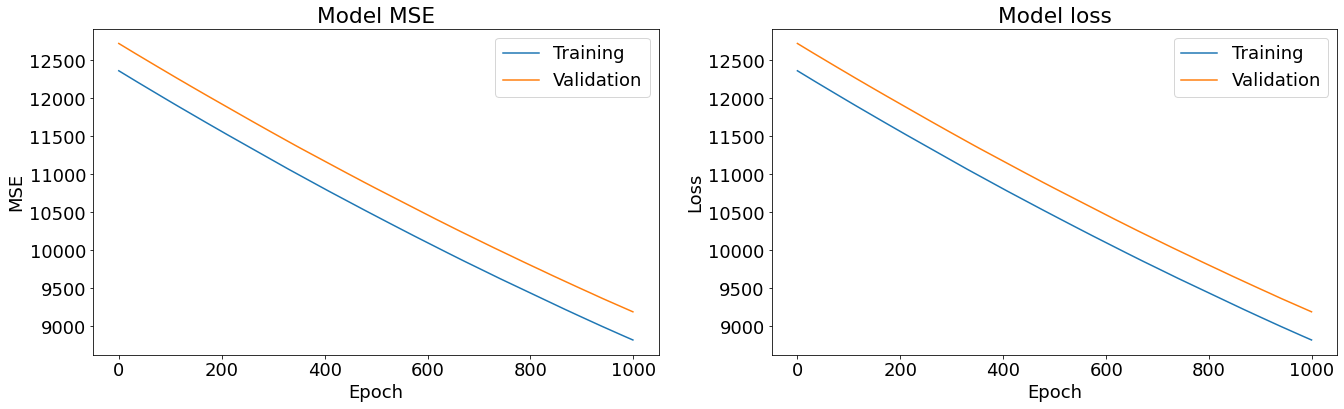

In [30]:
# insert code here

fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [34]:
# insert code here
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

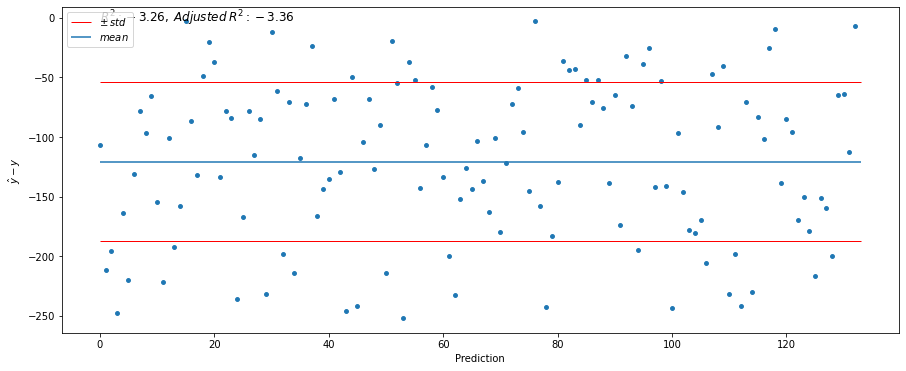

In [35]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



